# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

132. Import and inspect the cars dataset (cars.csv)!

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cars=pd.read_csv("cars.csv")

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [8]:
cars.model_year=cars.model_year.add(1900)

In [9]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

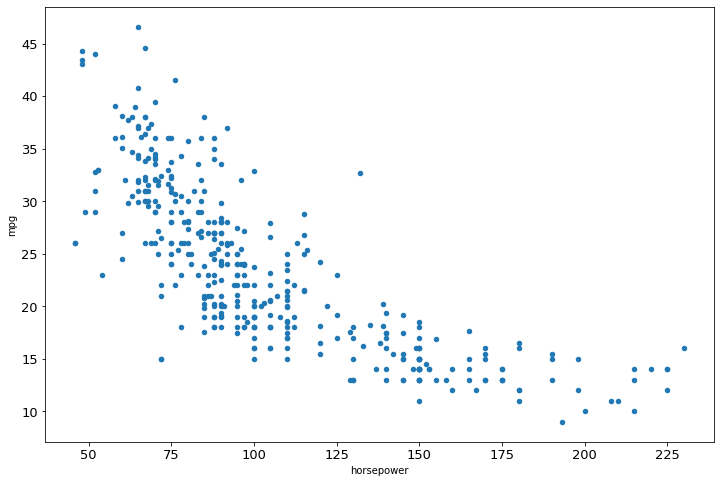

In [12]:
cars.plot(kind = "scatter", x = "horsepower", y = "mpg", figsize= (12, 8), fontsize= 13)
plt.show()

In [13]:
cars["gpm"] = (1/cars.mpg*100).round(2)

In [15]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88


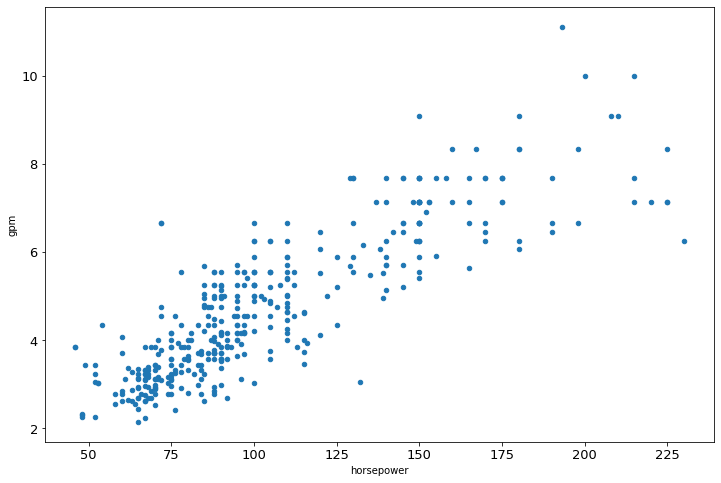

In [17]:
cars.plot(kind = "scatter", x = "horsepower", y = "gpm", figsize= (12, 8), fontsize= 13)
plt.show()

135. Create a __new column__ with the __manufacturer__ name!

In [24]:
cars["manufacturer"] = cars.name.str.split(" ", n = 1, expand = True)[0]

In [25]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford


In [26]:
cars.manufacturer.value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
vw               22
buick            17
pontiac          16
honda            13
mazda            12
mercury          12
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
opel              4
subaru            4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
ih                1
nissan            1
triumph           1
Name: manufacturer, dtype: int64

136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [27]:
mapper = {"usa":"north america", "europe":"europe", "japan":"asia"}

In [28]:
cars["continent"] = cars.origin.map(mapper)

In [30]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,north america
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,north america
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,north america
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,north america
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,north america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

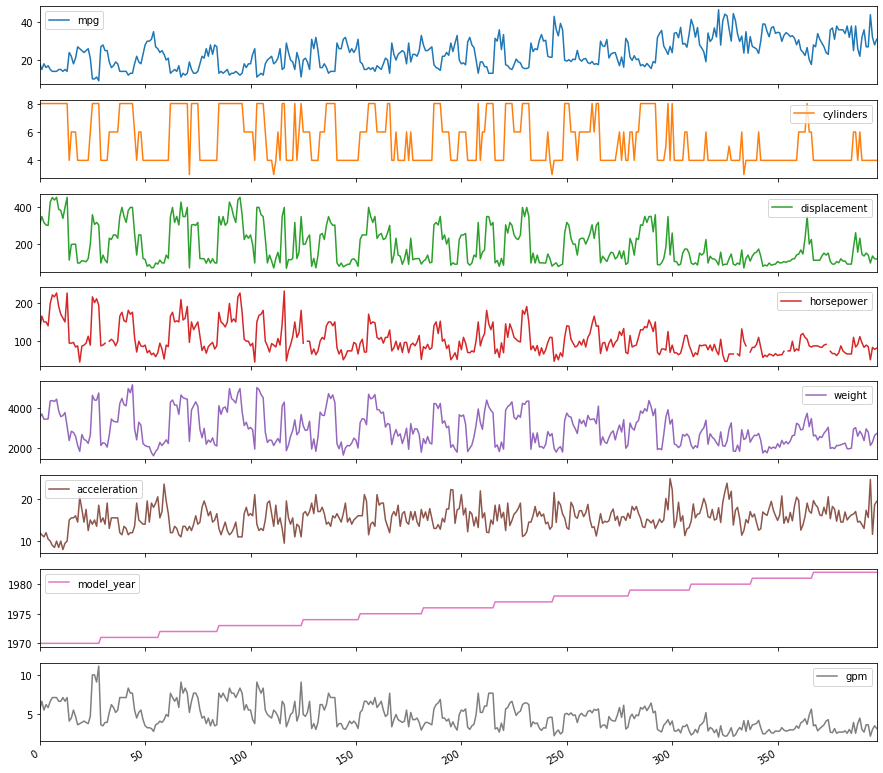

In [31]:
cars.plot(figsize = (15,15), subplots = True)
plt.show()

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

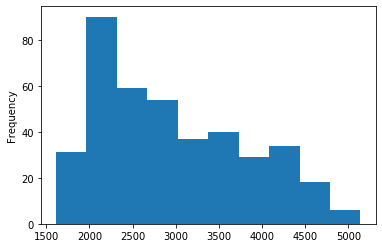

In [32]:
cars.weight.plot(kind = "hist")
plt.show()

In [33]:
labels = ["light", "medium", "heavy"]

In [34]:
pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels).value_counts()

medium    198
heavy     100
light     100
Name: weight, dtype: int64

In [35]:
cars["weight_cat"] = pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels)

In [36]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,north america,medium
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,north america,heavy
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,north america,medium
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,north america,medium
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,north america,medium


139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [40]:
cars.drop(columns=["cylinders", "displacement", "weight", "acceleration", "name", "manufacturer", "mpg"], inplace = True)

In [41]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat
0,130.0,1970,usa,5.56,north america,medium
1,165.0,1970,usa,6.67,north america,heavy
2,150.0,1970,usa,5.56,north america,medium
3,150.0,1970,usa,6.25,north america,medium
4,140.0,1970,usa,5.88,north america,medium


140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

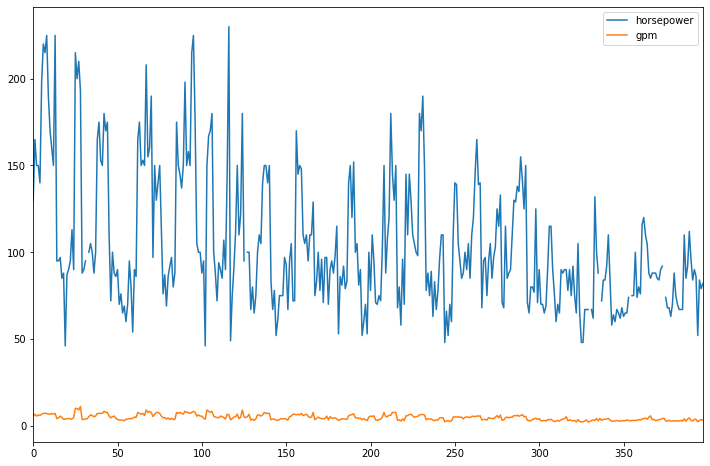

In [42]:
cars.loc[:, ["horsepower", "gpm"]].plot(figsize = (12,8))
plt.show()

In [43]:
cars["gpm_z"] = round((cars.gpm-cars.gpm.mean()) / cars.gpm.std(),2)
cars["horsepower_z"] = round((cars.horsepower-cars.horsepower.mean()) / cars.horsepower.std(),2)

In [44]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat,gpm_z,horsepower_z
0,130.0,1970,usa,5.56,north america,medium,0.48,0.66
1,165.0,1970,usa,6.67,north america,heavy,1.15,1.57
2,150.0,1970,usa,5.56,north america,medium,0.48,1.18
3,150.0,1970,usa,6.25,north america,medium,0.89,1.18
4,140.0,1970,usa,5.88,north america,medium,0.67,0.92


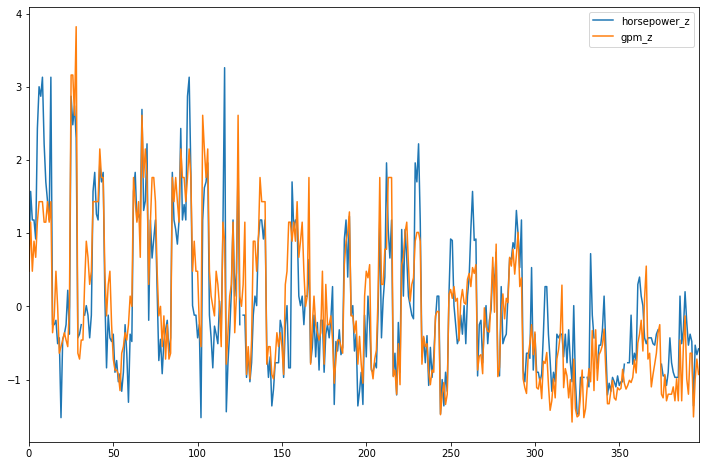

In [45]:
cars.loc[:, ["horsepower_z", "gpm_z"]].plot(figsize = (12,8))
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [46]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat,gpm_z,horsepower_z
0,130.0,1970,usa,5.56,north america,medium,0.48,0.66
1,165.0,1970,usa,6.67,north america,heavy,1.15,1.57
2,150.0,1970,usa,5.56,north america,medium,0.48,1.18
3,150.0,1970,usa,6.25,north america,medium,0.89,1.18
4,140.0,1970,usa,5.88,north america,medium,0.67,0.92


-----------------------------------------------------------------------------

In [47]:
cars = pd.get_dummies(cars, columns = ["model_year", "origin"], drop_first = True)

In [48]:
cars.head()

,horsepower,gpm,continent,weight_cat,gpm_z,horsepower_z,model_year_1971,model_year_1972,model_year_1973,model_year_1974,model_year_1975,model_year_1976,model_year_1977,model_year_1978,model_year_1979,model_year_1980,model_year_1981,model_year_1982,origin_japan,origin_usa
0,130.0,5.56,north america,medium,0.48,0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,165.0,6.67,north america,heavy,1.15,1.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,150.0,5.56,north america,medium,0.48,1.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,150.0,6.25,north america,medium,0.89,1.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,140.0,5.88,north america,medium,0.67,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
horsepower         392 non-null float64
gpm                398 non-null float64
continent          398 non-null object
weight_cat         398 non-null category
gpm_z              398 non-null float64
horsepower_z       392 non-null float64
model_year_1971    398 non-null uint8
model_year_1972    398 non-null uint8
model_year_1973    398 non-null uint8
model_year_1974    398 non-null uint8
model_year_1975    398 non-null uint8
model_year_1976    398 non-null uint8
model_year_1977    398 non-null uint8
model_year_1978    398 non-null uint8
model_year_1979    398 non-null uint8
model_year_1980    398 non-null uint8
model_year_1981    398 non-null uint8
model_year_1982    398 non-null uint8
origin_japan       398 non-null uint8
origin_usa         398 non-null uint8
dtypes: category(1), float64(4), object(1), uint8(14)
memory usage: 21.6+ KB


## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True